# Breaking Down the Evolution and Impact of Shot Selection in the NBA

Michael Zheng

<br>

Questions I Seek to Answer:
* How Has Shot Selection Changed Over Time?
* Is There a Correlation Between Attempting More Threes and Scoring More Points?
* How Much Does Three-point Percentage Impact Winning Compared to Two-point Percentage?
* Which Factor Correlates Most With Winning NBA Games?



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import urllib.request
from PIL import Image
from sklearn.metrics import r2_score

## Reading and Manipulating the Data

In [ ]:
team_stats = pd.read_csv('nba_team_stats_00_to_23.csv')
team_stats

,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,711,Atlanta Hawks,82,25,57,0.305,3946,7459,2876,6668,...,3518,1559,1368,634,387,513,1863,7,-427,2000-01
712,712,Vancouver Grizzlies,82,23,59,0.280,3956,7522,2870,6539,...,3325,1899,1291,586,359,476,1733,5,-470,2000-01
713,713,Washington Wizards,82,19,63,0.232,3936,7645,2833,6453,...,3386,1647,1391,630,383,511,1913,9,-547,2000-01
714,714,Golden State Warriors,82,17,65,0.207,3956,7584,2937,7175,...,3730,1788,1301,742,410,493,1727,6,-742,2000-01


In [ ]:
team_stats[['Team', 'season'] + list(team_stats.columns[2:])]

,Team,season,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,Boston Celtics,2023-24,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,Denver Nuggets,2023-24,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,Oklahoma City Thunder,2023-24,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,Minnesota Timberwolves,2023-24,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,LA Clippers,2023-24,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,Atlanta Hawks,2000-01,82,25,57,0.305,3946,7459,2876,6668,...,3518,1559,1368,634,387,513,1863,7,-427,2000-01
712,Vancouver Grizzlies,2000-01,82,23,59,0.280,3956,7522,2870,6539,...,3325,1899,1291,586,359,476,1733,5,-470,2000-01
713,Washington Wizards,2000-01,82,19,63,0.232,3936,7645,2833,6453,...,3386,1647,1391,630,383,511,1913,9,-547,2000-01
714,Golden State Warriors,2000-01,82,17,65,0.207,3956,7584,2937,7175,...,3730,1788,1301,742,410,493,1727,6,-742,2000-01


In [ ]:
team_stats.columns

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

In [ ]:
# add columns for 2-pt shooting and per-game metrics
team_stats['two_pointers_made'] = team_stats['field_goals_made'] - team_stats['three_pointers_made']
team_stats['two_pointers_attempted'] = team_stats['field_goals_attempted'] - team_stats['three_pointers_attempted']
team_stats['two_point_percentage'] = team_stats['two_pointers_made'] / team_stats['two_pointers_attempted'] * 100
team_stats['three_pointers_attempted_per_game'] = team_stats['three_pointers_attempted'] / team_stats['games_played']
team_stats['two_pointers_attempted_per_game'] = team_stats['two_pointers_attempted'] / team_stats['games_played']
team_stats['points_per_game'] = team_stats['points'] / team_stats['games_played']

# group by season to get league-wide averages per year
grouped_by_season = team_stats.groupby('season')[['three_pointers_attempted', 'two_pointers_attempted', 'points', 'games_played']].sum()
grouped_by_season['three_pointers_attempted_per_game'] = grouped_by_season['three_pointers_attempted'] / grouped_by_season['games_played']
grouped_by_season['two_pointers_attempted_per_game'] = grouped_by_season['two_pointers_attempted'] / grouped_by_season['games_played']
grouped_by_season['points_per_game'] = grouped_by_season['points'] / grouped_by_season['games_played']
grouped_by_season

,three_pointers_attempted,two_pointers_attempted,points,games_played,three_pointers_attempted_per_game,two_pointers_attempted_per_game,points_per_game
season,,,,,,,
2000-01,32597,159067,225459,2378,13.707738,66.891085,94.810345
2001-02,35074,158189,227043,2378,14.749369,66.521867,95.476451
2002-03,34913,157196,226102,2378,14.681665,66.104289,95.080740
2003-04,35493,154310,222100,2378,14.925568,64.890664,93.397813
2004-05,38748,158878,239109,2460,15.751220,64.584553,97.198780
2005-06,39313,155001,238641,2460,15.980894,63.008537,97.008537
2006-07,41671,154401,242899,2460,16.939431,62.764634,98.739431
2007-08,44544,155957,245811,2460,18.107317,63.397154,99.923171
2008-09,44583,154471,245879,2460,18.123171,62.793089,99.950813


### Create a DataFrame called `last_season` that only include team stats from last season. Additionally, add team logos to be used later for displaying on scatterplots.

In [ ]:
# create a df filtered by last season only
last_season = team_stats[team_stats['season'] == '2023-24']

# team abbreviations dict
abbr = {'Atlanta Hawks': 'ATL', 'Boston Celtics': 'BOS', 'Brooklyn Nets': 'BKN', 'Charlotte Hornets': 'CHA', 'Chicago Bulls': 'CHI',
        'Cleveland Cavaliers': 'CLE', 'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 'Detroit Pistons': 'DET', 'Golden State Warriors': 'GSW',
        'Houston Rockets': 'HOU', 'Indiana Pacers': 'IND', 'LA Clippers': 'LAC', 'Los Angeles Lakers': 'LAL', 'Memphis Grizzlies': 'MEM',
        'Miami Heat': 'MIA', 'Milwaukee Bucks': 'MIL', 'Minnesota Timberwolves': 'MIN', 'New Orleans Pelicans': 'NO', 'New York Knicks': 'NYK',
        'Oklahoma City Thunder': 'OKC', 'Orlando Magic': 'ORL', 'Philadelphia 76ers': 'PHI', 'Phoenix Suns': 'PHX', 'Portland Trail Blazers': 'POR',
        'Sacramento Kings': 'SAC', 'San Antonio Spurs': 'SAS', 'Toronto Raptors': 'TOR', 'Utah Jazz': 'UTH', 'Washington Wizards': 'WAS'}
last_season['team_abbr'] = last_season['Team'].map(abbr)

# add team logos to plot on the scatter plot
logo_base = "https://a.espncdn.com/i/teamlogos/nba/500/"
last_season['logo_url'] = last_season['team_abbr'].apply(lambda abbr: f"{logo_base}{abbr.lower()}.png")
last_season

/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_84250/496466956.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_season['team_abbr'] = last_season['Team'].map(abbr)
/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_84250/496466956.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_season['logo_url'] = last_season['team_abbr'].apply(lambda abbr: f"{logo_base}{abbr.lower()}.png")


,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,plus_minus,season,two_pointers_made,two_pointers_attempted,two_point_percentage,three_pointers_attempted_per_game,two_pointers_attempted_per_game,points_per_game,team_abbr,logo_url
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,930,2023-24,2250,3914,57.485948,42.463415,47.731707,120.573171,BOS,https://a.espncdn.com/i/teamlogos/nba/500/bos.png
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,431,2023-24,2652,4719,56.198347,31.219512,57.548780,114.853659,DEN,https://a.espncdn.com/i/teamlogos/nba/500/den.png
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,608,2023-24,2563,4519,56.716088,34.207317,55.109756,120.085366,OKC,https://a.espncdn.com/i/teamlogos/nba/500/okc.png
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,529,2023-24,2346,4293,54.647100,32.695122,52.353659,112.975610,MIN,https://a.espncdn.com/i/teamlogos/nba/500/min.png
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,269,2023-24,2437,4389,55.525177,33.158537,53.524390,115.621951,LAC,https://a.espncdn.com/i/teamlogos/nba/500/lac.png
5,5,Dallas Mavericks,82,50,32,0.610,3941,9664,3535,7352,...,181,2023-24,2338,4110,56.885645,39.536585,50.121951,117.853659,DAL,https://a.espncdn.com/i/teamlogos/nba/500/dal.png
6,6,New York Knicks,82,50,32,0.610,3946,9249,3385,7272,...,376,2023-24,2302,4336,53.090406,35.804878,52.878049,112.792683,NYK,https://a.espncdn.com/i/teamlogos/nba/500/nyk.png
7,7,Milwaukee Bucks,82,49,33,0.598,3961,9756,3538,7258,...,215,2023-24,2375,4136,57.422631,38.073171,50.439024,118.975610,MIL,https://a.espncdn.com/i/teamlogos/nba/500/mil.png
8,8,New Orleans Pelicans,82,49,33,0.598,3941,9436,3484,7165,...,362,2023-24,2461,4492,54.786287,32.597561,54.780488,115.073171,NO,https://a.espncdn.com/i/teamlogos/nba/500/no.png
9,9,Phoenix Suns,82,49,33,0.598,3956,9532,3482,7063,...,251,2023-24,2462,4392,56.056466,32.573171,53.560976,116.243902,PHX,https://a.espncdn.com/i/teamlogos/nba/500/phx.png


## Visualization #1

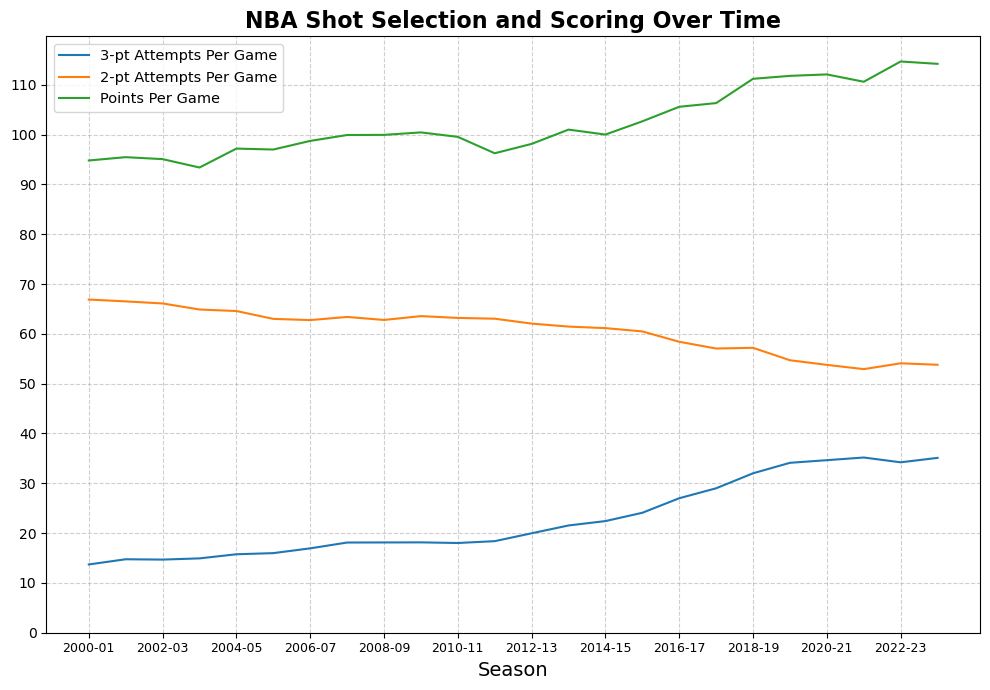

In [ ]:
# Visualization #1: Plot time-series plot of 3-pt attempts, 2-pt attempts, and points per game over time
plt.figure(figsize=(10, 7))
plt.plot(grouped_by_season.index, grouped_by_season['three_pointers_attempted_per_game'], label='3-pt Attempts Per Game')
plt.plot(grouped_by_season.index, grouped_by_season['two_pointers_attempted_per_game'], label='2-pt Attempts Per Game')
plt.plot(grouped_by_season.index, grouped_by_season['points_per_game'], label = 'Points Per Game')

plt.title('NBA Shot Selection and Scoring Over Time', fontsize=16, weight='bold')
plt.xlabel('Season', fontsize=14)
plt.xticks(np.arange(0, len(grouped_by_season.index), 2), fontsize=9)
plt.yticks(np.arange(0, 120, 10), fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6, which="major")

plt.legend(fontsize=10.5)
plt.tight_layout()
plt.show()

## Visualization #2

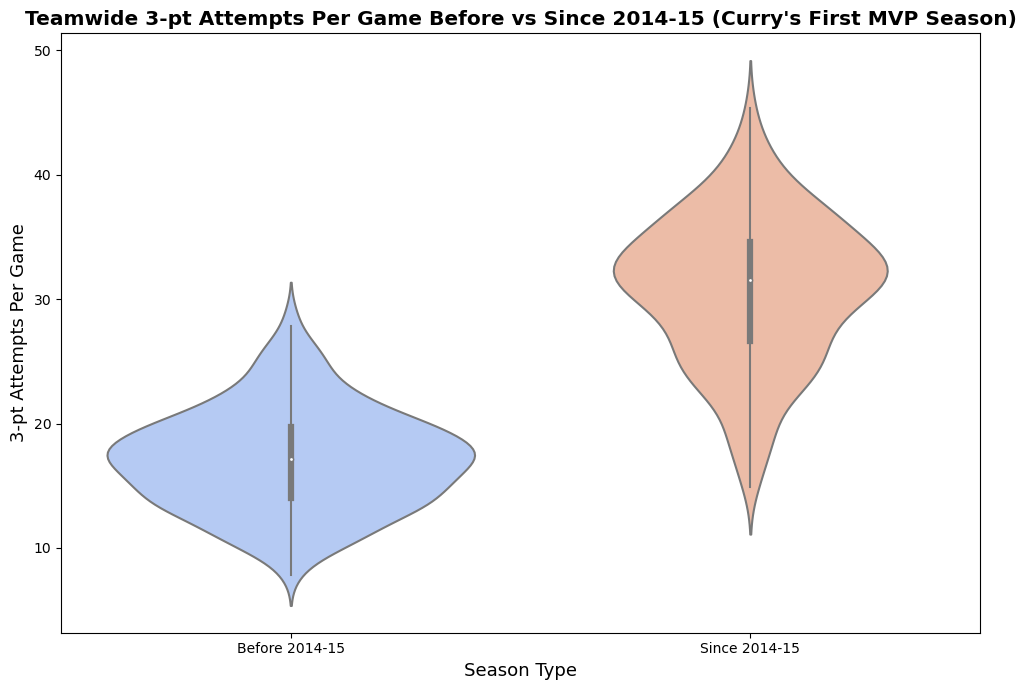

In [ ]:
# Visualization #2: Plot violin plot of each team's 3-pt attempts per game by seasons before 2014-15 vs since 2014-15 (Curry's First MVP Season)

# Add a categorical variable to the dataframe (Before vs Since 2014-15)
team_stats['season_type'] = np.where(team_stats['season'] < '2014-15', 'Before 2014-15', 'Since 2014-15')

# Plot the data
plt.figure(figsize=(10, 7))
sns.violinplot(data=team_stats, x='season_type', y='three_pointers_attempted_per_game', order=['Before 2014-15', 'Since 2014-15'],
               inner='box', palette='coolwarm')
plt.title("Teamwide 3-pt Attempts Per Game Before vs Since 2014-15 (Curry's First MVP Season)", fontsize=14.5, weight='bold')
plt.ylabel('3-pt Attempts Per Game', fontsize=13)
plt.xlabel('Season Type', fontsize=13)
plt.tight_layout()
plt.show()

## Visualization #3

/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_84250/3096910416.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x_line, y_line, 'k--', label=f"r = {r:.2f}", alpha=0.75, c='tab:blue')


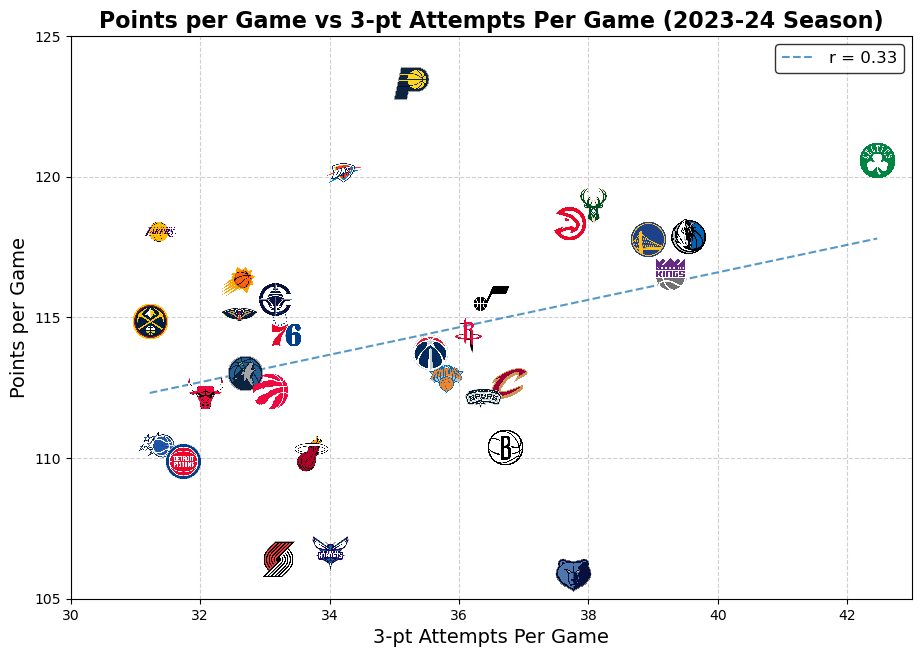

In [ ]:
# Plot Points Per Game vs 3-pt Attempts Scatterplot
fig, ax = plt.subplots(figsize=(10,7))
for i, row in last_season.iterrows():
  with urllib.request.urlopen(row['logo_url']) as url:
    img = Image.open(url)
    img = np.array(img)
  imagebox=OffsetImage(img, zoom=0.055)
  ab = AnnotationBbox(imagebox, (row['three_pointers_attempted_per_game'], row['points_per_game']), frameon=False)
  ax.add_artist(ab)

# make calculations for regression line
x = last_season['three_pointers_attempted_per_game']
y = last_season['points_per_game']
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min()-0.001, x.max()+0.001, 200)
y_line = m * x_line + b
y_pred = x * m + b
r = r2_score(y, y_pred) ** 0.5


ax.set_title('Points per Game vs 3-pt Attempts Per Game (2023-24 Season)', fontsize=16, weight='bold')
ax.set_xlabel('3-pt Attempts Per Game', fontsize=14)
ax.set_ylabel('Points per Game', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6, which="major")
ax.set_ylim(105, 125)
ax.set_xlim(30,43)
plt.yticks(np.arange(105, 126, 5), fontsize=10)
ax.plot(x_line, y_line, 'k--', label=f"r = {r:.2f}", alpha=0.75, c='tab:blue')
ax.legend(fontsize=12, edgecolor='black')
plt.tight_layout()
plt.show()

## Visualization #4

/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_84250/3549365133.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x1_line, y1_line, 'k--', label=f"y = {m1:.1f}x + {b1:.1f}\nr = {r_threes:.2f}", alpha=0.75, c='tab:blue')
/var/folders/rj/tzk4w23s0md7pcnpq4w2fy6c0000gn/T/ipykernel_84250/3549365133.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x2_line, y2_line, 'k--', label=f"y = {m2:.1f}x + {b2:.1f}\nr = {r_twos:.2f}", alpha=0.75, c='tab:blue')


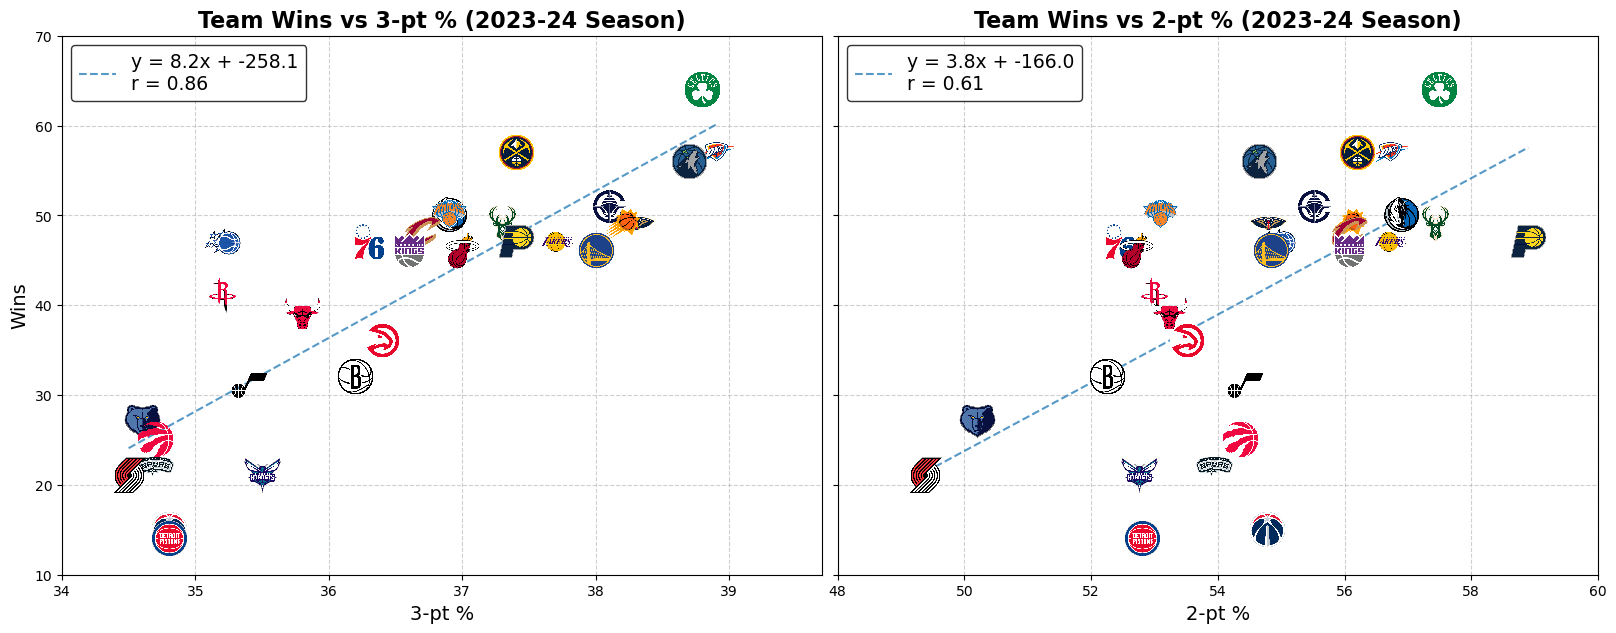

In [ ]:
# Plot Wins vs 3-pt % and Wins vs 2-pt %
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7), sharey=True)
plt.subplots_adjust(wspace=0.02, left=0.02, right=0.98)
for i, row in last_season.iterrows():
  with urllib.request.urlopen(row['logo_url']) as url:
    img = Image.open(url)
    img = np.array(img)
  imagebox=OffsetImage(img, zoom=0.055)
  ab1 = AnnotationBbox(imagebox, (row['three_point_percentage'], row['wins']), frameon=False)
  ax1.add_artist(ab1)
  ab2 = AnnotationBbox(imagebox, (row['two_point_percentage'], row['wins']), frameon=False)
  ax2.add_artist(ab2)

# make calculations for regression line
x1 = last_season['three_point_percentage']
y1 = last_season['wins']
m1, b1 = np.polyfit(x1, y1, 1)
x1_line = np.linspace(x1.min()-0.001, x1.max()+0.001, 200)
y1_line = m1 * x1_line + b1
y1_pred = x1 * m1 + b1
r_threes = r2_score(y1, y1_pred) ** 0.5

x2 = last_season['two_point_percentage']
y2 = last_season['wins']
m2, b2 = np.polyfit(x2, y2, 1)
x2_line = np.linspace(x2.min()-0.001, x2.max()+0.001, 200)
y2_line = m2 * x2_line + b2
y2_pred = x2 * m2 + b2
r_twos = r2_score(y2, y2_pred) ** 0.5

# customize the graphs
ax1.set_title('Team Wins vs 3-pt % (2023-24 Season)', fontsize=16, weight='bold')
ax1.set_xlabel('3-pt %', fontsize=14)
ax1.set_ylabel('Wins', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6, which="major")
ax1.set_ylim(10, 70)
ax1.set_xlim(34,39.7)
# plt.yticks(np.arange(105, 126, 5), fontsize=10)
ax1.plot(x1_line, y1_line, 'k--', label=f"y = {m1:.1f}x + {b1:.1f}\nr = {r_threes:.2f}", alpha=0.75, c='tab:blue')
ax1.legend(fontsize=13.5, edgecolor='black', loc='upper left')

ax2.set_title('Team Wins vs 2-pt % (2023-24 Season)', fontsize=16, weight='bold')
ax2.set_xlabel('2-pt %', fontsize=14)
# ax2.set_ylabel('Wins', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6, which="major")
ax2.set_ylim(10, 70)
ax2.set_xlim(48,60)
# plt.yticks(np.arange(105, 126, 5), fontsize=10)
ax2.plot(x2_line, y2_line, 'k--', label=f"y = {m2:.1f}x + {b2:.1f}\nr = {r_twos:.2f}", alpha=0.75, c='tab:blue')
ax2.legend(fontsize=13.5, edgecolor='black', loc='upper left')



# plt.tight_layout()
plt.show()

## Visualization #5

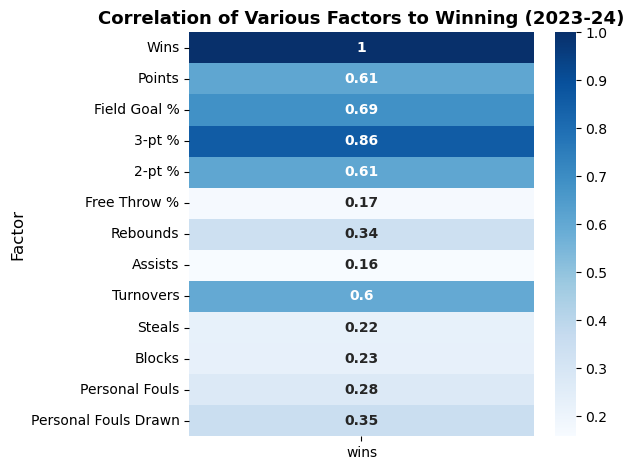

In [ ]:
# Plot a heap map. Which factor correlates most with winning?
last_season.columns
factors = ['wins', 'points', 'field_goal_percentage', 'three_point_percentage', 'two_point_percentage', 'free_throw_percentage',
  'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'personal_fouls_drawn']

correlation_df = abs(last_season[factors].corr()[['wins']])
correlation_df.index = ['Wins', 'Points', 'Field Goal %', '3-pt %', '2-pt %', 'Free Throw %',
  'Rebounds', 'Assists', 'Turnovers', 'Steals', 'Blocks', 'Personal Fouls', 'Personal Fouls Drawn']

# plot the heat map
sns.heatmap(correlation_df, cmap='Blues', annot=True, annot_kws={"fontweight": "bold", "fontsize": 10})
plt.title('Correlation of Various Factors to Winning (2023-24)', fontsize=13, weight='bold')
plt.ylabel('Factor', fontsize = 12)
plt.tight_layout()
plt.show()

## Thank You for Reading!